# 인천공항 이용자수 분석 및 예측

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc

file_path = './ref/출입국항구내외국인성별국제이동연간_20250305.csv'
ori = pd.read_csv(file_path, encoding = 'EUC-KR')
ori.head()

,출입국항별,내외국인별,성별,시점,항목,데이터
0,인천공항,내국인,남자,2001,입국자,70444
1,인천공항,내국인,남자,2001,출국자,96551
2,인천공항,내국인,남자,2002,입국자,101032
3,인천공항,내국인,남자,2002,출국자,124319
4,인천공항,내국인,남자,2003,입국자,102093


In [2]:
ex1_data = ori.copy()
ex1_data.columns = ['Airport', 'type1', 'gender', 'year', 'type2', 'value']
ex1_data

,Airport,type1,gender,year,type2,value
0,인천공항,내국인,남자,2001,입국자,70444
1,인천공항,내국인,남자,2001,출국자,96551
2,인천공항,내국인,남자,2002,입국자,101032
3,인천공항,내국인,남자,2002,출국자,124319
4,인천공항,내국인,남자,2003,입국자,102093
...,...,...,...,...,...,...
179,인천공항,외국인,여자,2021,출국자,112458
180,인천공항,외국인,여자,2022,입국자,172332
181,인천공항,외국인,여자,2022,출국자,106797
182,인천공항,외국인,여자,2023,입국자,181388


In [3]:
filter1 = ex1_data['type1'] == '외국인'
ex2_data = ex1_data[filter1].copy()
ex3_data = ex1_data[filter1].copy()
ex2_data

,Airport,type1,gender,year,type2,value
92,인천공항,외국인,남자,2001,입국자,60699
93,인천공항,외국인,남자,2001,출국자,44548
94,인천공항,외국인,남자,2002,입국자,77745
95,인천공항,외국인,남자,2002,출국자,58784
96,인천공항,외국인,남자,2003,입국자,85643
...,...,...,...,...,...,...
179,인천공항,외국인,여자,2021,출국자,112458
180,인천공항,외국인,여자,2022,입국자,172332
181,인천공항,외국인,여자,2022,출국자,106797
182,인천공항,외국인,여자,2023,입국자,181388


In [4]:
ex1_data = ex1_data.groupby('year')['value'].sum().reset_index(name = 'total')
ex1_data.head()

,year,total
0,2001,521210
1,2002,697631
2,2003,747272
3,2004,769912
4,2005,991717


In [5]:
filter2 = ex2_data['type2'] == '입국자'
ex2_filtered = ex2_data[filter2]

filter3 = ex2_data['type2'] == '출국자'
ex3_filtered = ex2_data[filter3]

ex2_data = ex2_filtered.groupby('year')['value'].sum().reset_index(name = 'total')

ex3_data = ex3_filtered.groupby('year')['value'].sum().reset_index(name = 'total')

# filter4 = ex2_data['type2']
# ex4_filtered = ex2_data[filter4]
# ex4_data = ex4_filtered.groupby('year')['value'].sum().reset_index(name = 'total')

In [6]:
path = 'C:\\Windows\\Fonts\\Hancom Gothic Regular.ttf'
font_name = fm.FontProperties(fname = path).get_name()
rc('font', family = font_name)

<Axes: title={'center': '2001~2023년 인천공항 입국 외국인 차트'}>

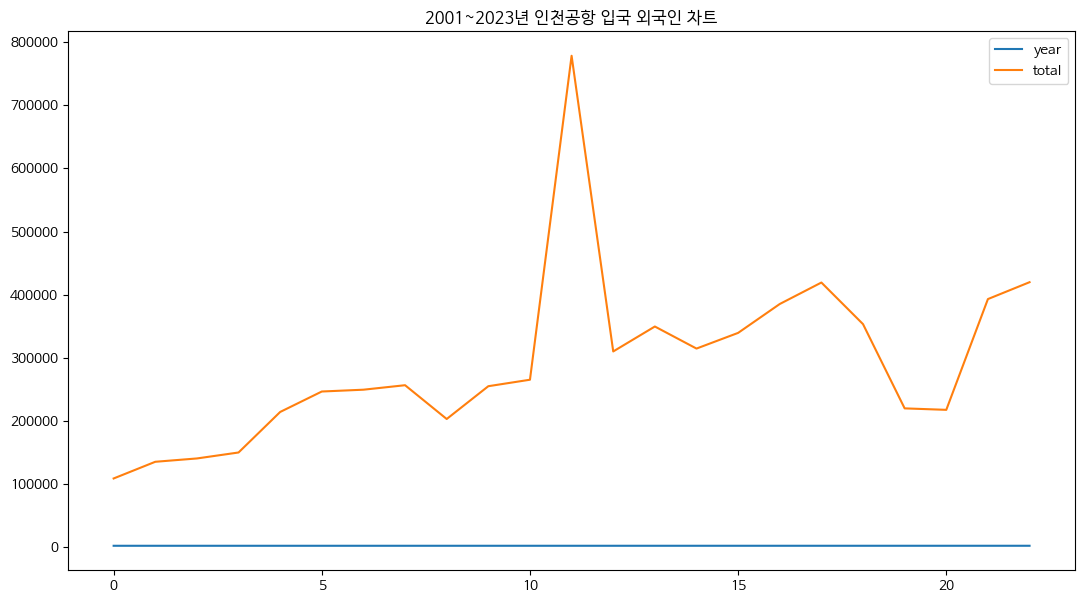

In [7]:
ex2_data.plot(figsize = (13, 7), title = '2001~2023년 인천공항 입국 외국인 차트')

<Axes: title={'center': '2001~2023년 인천공항 출국 외국인 차트'}>

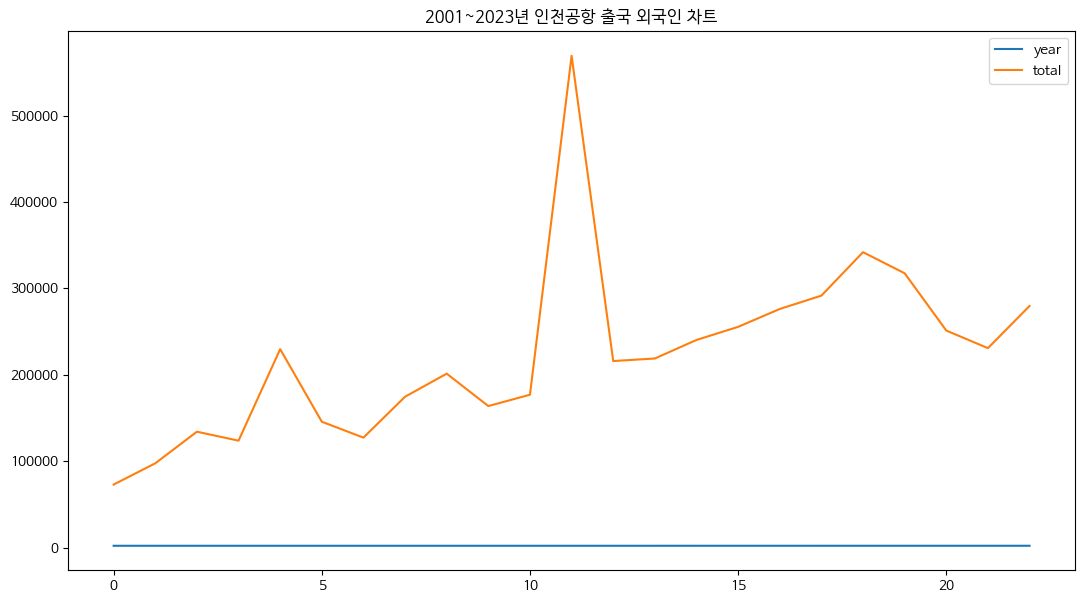

In [8]:
ex3_data.plot(figsize = (13, 7), title = '2001~2023년 인천공항 출국 외국인 차트')

In [9]:
#!pip install --upgrade plotly
#!pip install tqdm
#!pip install --upgrade jupyter ipywidgets

In [10]:
from prophet import Prophet

In [11]:
# 페이스북에서는 time(year)을 ds, value는 y를 사용하므로 전처리 해준다.
ex4_data = ex1_data.copy()
ex4_data['year'] = pd.to_datetime(ex4_data['year'], format = '%Y')
ex4_data = ex4_data.rename(columns = {'year' : 'ds', 'total' : 'y'})
ex4_data.tail()

,ds,y
18,2019-01-01,1198598
19,2020-01-01,1129092
20,2021-01-01,867277
21,2022-01-01,1073387
22,2023-01-01,1124211


In [12]:
m = Prophet()
m.fit(ex4_data)

12:20:01 - cmdstanpy - INFO - Chain [1] start processing
12:20:01 - cmdstanpy - INFO - Chain [1] done processing


C:\Dev\Lang\Python313\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


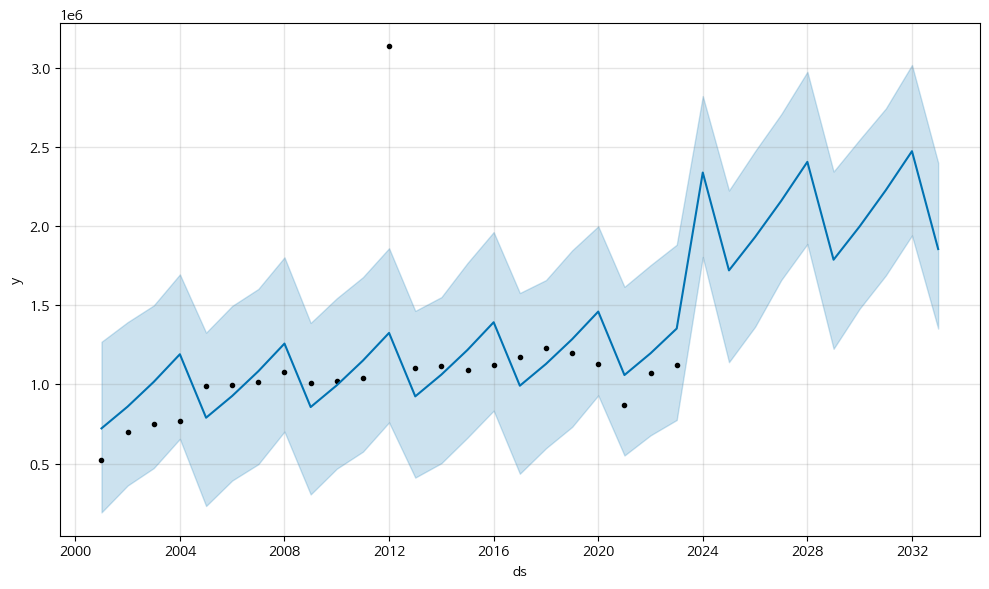

<Figure size 1000x1500 with 0 Axes>

In [13]:
future = m.make_future_dataframe(periods = 10, freq = 'Y')
forecast = m.predict(future)
fig1 = m.plot(forecast)
plt.savefig('./chart/예측.png')
plt.figure(figsize = (10, 15))
plt.show()

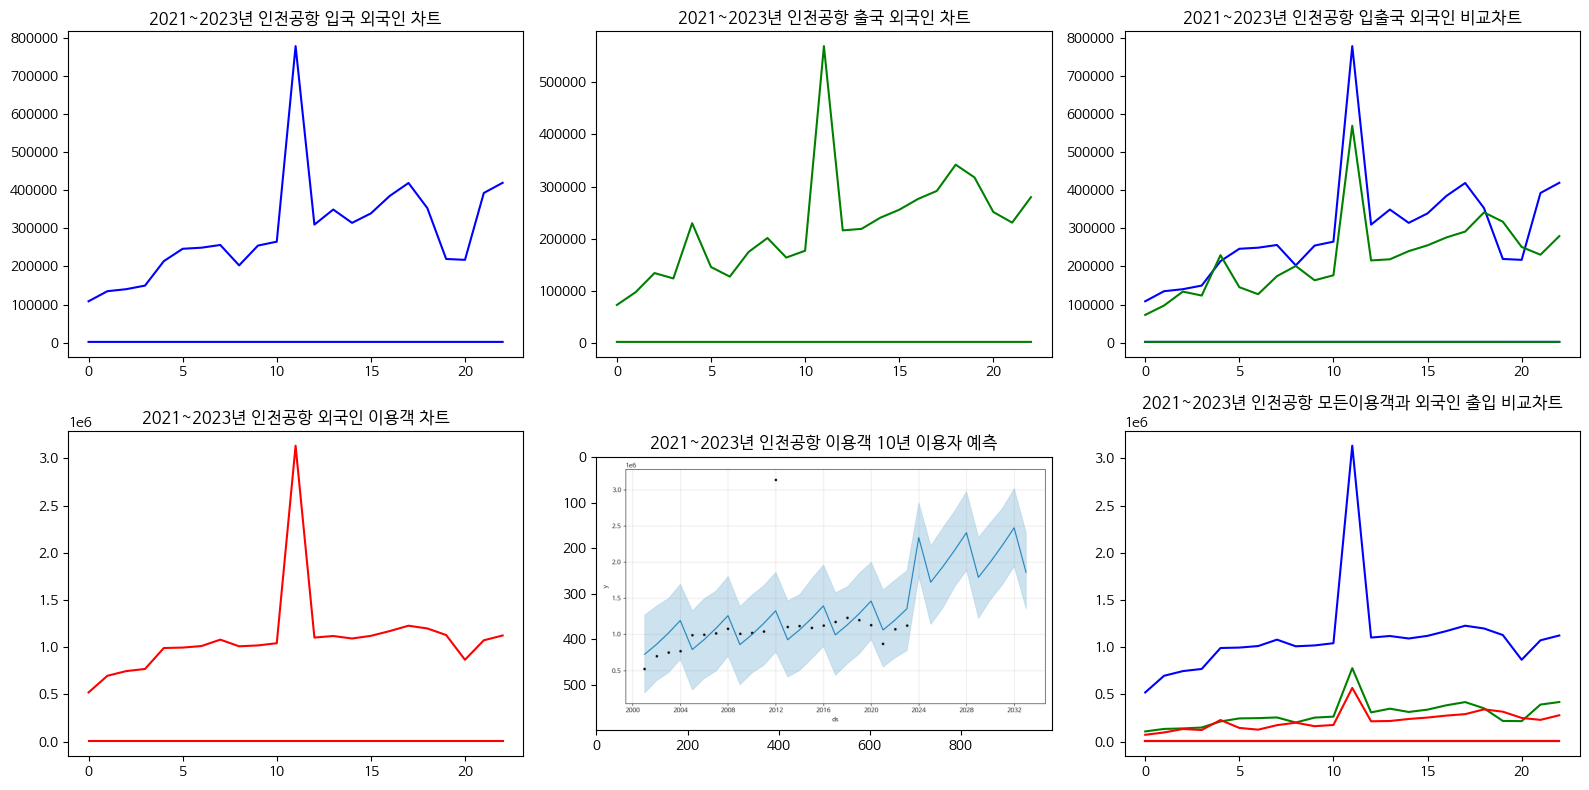

In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('./chart/예측.png')
fig, axs = plt.subplots(2, 3, figsize = (16, 8))

axs[0,0].plot(ex2_data,color="b")
axs[0,1].plot(ex3_data,color="g") 
axs[0,2].plot(ex2_data,color="b") 
axs[0,2].plot(ex3_data,color="g") 
axs[1,0].plot(ex1_data,color="r") 
axs[1,2].plot(ex1_data,color="b") 
axs[1,2].plot(ex2_data,color="g") 
axs[1,2].plot(ex3_data,color="r") 
axs[0,0].set_title("2021~2023년 인천공항 입국 외국인 차트")
axs[0,1].set_title("2021~2023년 인천공항 출국 외국인 차트")
axs[0,2].set_title("2021~2023년 인천공항 입출국 외국인 비교차트")
axs[1,0].set_title("2021~2023년 인천공항 외국인 이용객 차트")
axs[1,1].set_title("2021~2023년 인천공항 이용객 10년 이용자 예측")
axs[1,2].set_title("2021~2023년 인천공항 모든이용객과 외국인 출입 비교차트")

axins = fig.add_axes(axs[1, 1])
axins.imshow(img)
plt.tight_layout()
plt.show()